Reza Mansourikhah 810103246

problem3 part b

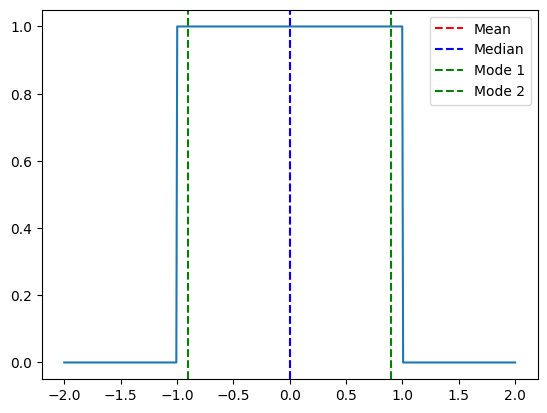

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2, 2, 500)
y = (np.where((x >= -1) & (x <= 0), 1, 0) +
     np.where((x >= 0) & (x <= 1), 1, 0))

plt.plot(x, y)
mean = np.mean(x * y)
median = np.median(x[y > 0])
plt.axvline(x=float(mean), color='r', linestyle='--', label='Mean')
plt.axvline(x=float(median), color='b', linestyle='--', label='Median')
plt.axvline(x=-0.9, color='g', linestyle='--', label='Mode 1')
plt.axvline(x=0.9, color='g', linestyle='--', label='Mode 2')
plt.legend()
plt.show()


problem6

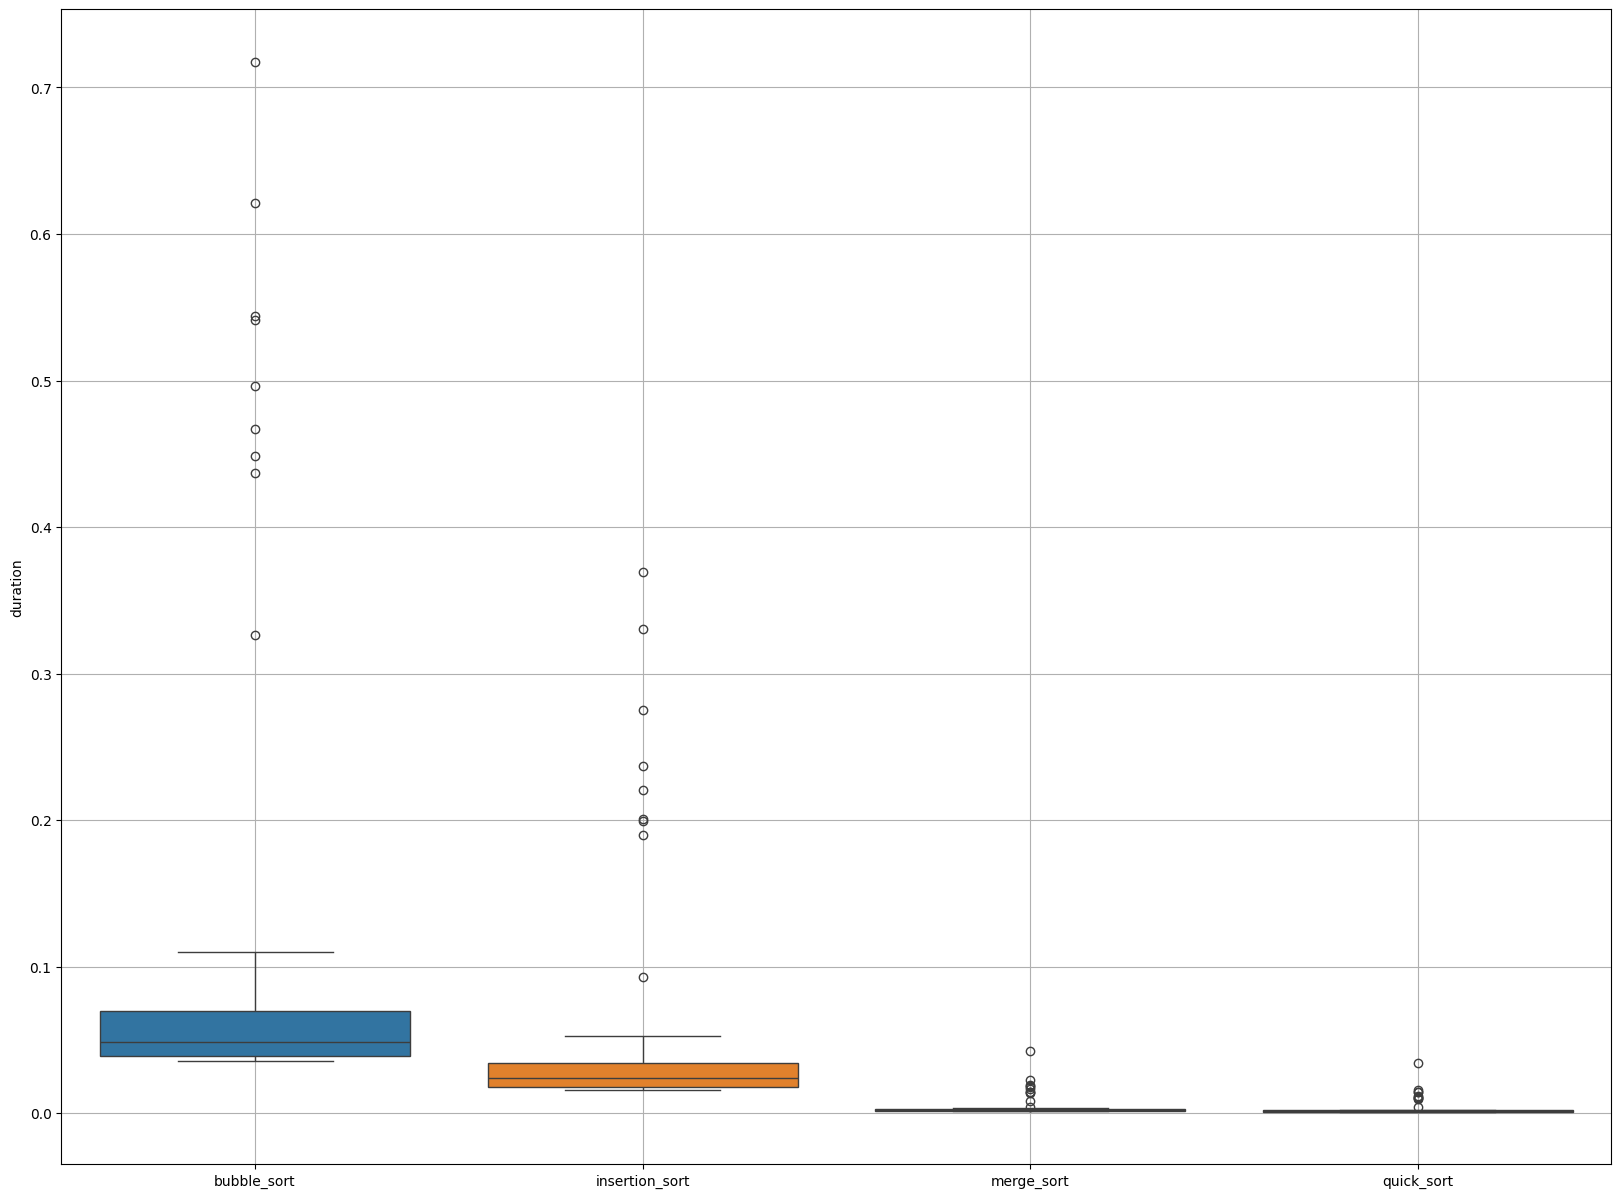

                    mean    median  standard_deviation
bubble_sort     0.094512  0.048293            0.136413
insertion_sort  0.044399  0.024128            0.065119
merge_sort      0.003665  0.001858            0.005784
quick_sort      0.002682  0.001454            0.004423
skewed:
 bubble_sort       3.135980
insertion_sort    3.456200
merge_sort        4.202014
quick_sort        4.801043
dtype: float64
Kurtosis:
 bubble_sort        8.884937
insertion_sort    11.667594
merge_sort        21.229449
quick_sort        28.342619
dtype: float64
stable algorithm: quick_sort
volatile algorithm: bubble_sort


In [3]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr


def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr


def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr[1:] if x < pivot]
    middle = [pivot]
    right = [x for x in arr[1:] if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        merge_sort(left)
        merge_sort(right)
        i = j = k = 0
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1
        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
    return arr


# Prepare to collect durations
results = {
    "bubble_sort": [],
    "insertion_sort": [],
    "merge_sort": [],
    "quick_sort": []
}

# Run experiments
for _ in range(100):
    random_list = np.random.randint(1, 100000, size=1000).tolist()
    start_time = time.time()
    bubble_sort(random_list.copy())
    duration = time.time() - start_time
    results['bubble_sort'].append(duration)

    start_time = time.time()
    insertion_sort(random_list.copy())
    duration = time.time() - start_time
    results['insertion_sort'].append(duration)

    start_time = time.time()
    merge_sort(random_list.copy())
    duration = time.time() - start_time
    results['merge_sort'].append(duration)

    start_time = time.time()
    quick_sort(random_list.copy())
    duration = time.time() - start_time
    results['quick_sort'].append(duration)

results_df = pd.DataFrame(results)
plt.figure(figsize=(20, 15))
sns.boxplot(data=results_df)
plt.ylabel("duration")
plt.grid()
plt.show()

mean_values = results_df.mean()
median_values = results_df.median()
standard_deviation_values = results_df.std()

statistics = pd.DataFrame({
    'mean': mean_values,
    'median': median_values,
    'standard_deviation': standard_deviation_values
})

print(statistics)
print("=" * 100)
skewed = results_df.skew()
print("skewed:\n", skewed)
print("=" * 100)
kurtosis = results_df.kurtosis()
print("Kurtosis:\n", kurtosis)
print("=" * 100)
min_standard_deviation = statistics['standard_deviation'].min()
max_standard_deviation = statistics['standard_deviation'].max()
stable = statistics[statistics['standard_deviation'] == min_standard_deviation].index[0]
volatile = statistics[statistics['standard_deviation'] == max_standard_deviation].index[0]
print(f"stable algorithm: {stable}")
print(f"volatile algorithm: {volatile}")


problem7

generating picture waiting ........


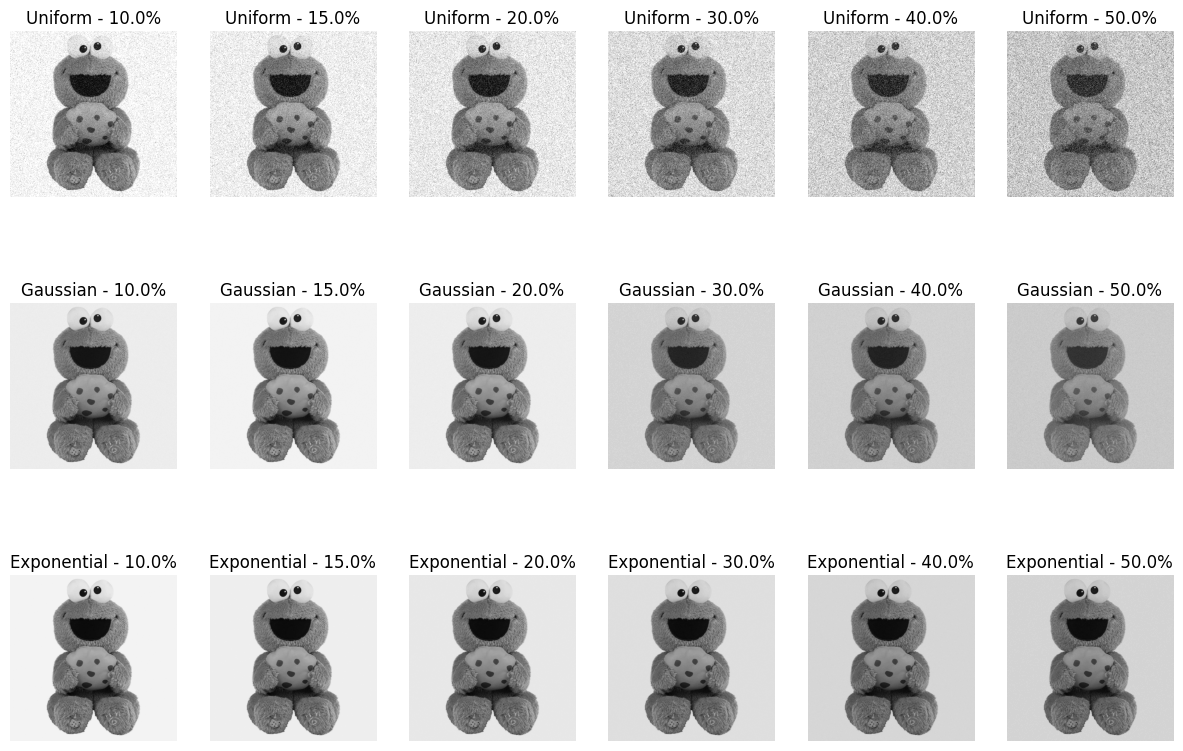

part A finished.
Part B started
Average corrupted faces for uniform at 20.0%: 0.0
Average corrupted faces for uniform at 30.0%: 0.0
Average corrupted faces for uniform at 40.0%: 100.0
Average corrupted faces for uniform at 50.0%: 100.0
Average corrupted faces for gaussian at 20.0%: 94.0
Average corrupted faces for gaussian at 30.0%: 98.0
Average corrupted faces for gaussian at 40.0%: 100.0
Average corrupted faces for gaussian at 50.0%: 96.0
Average corrupted faces for exponential at 20.0%: 0.0
Average corrupted faces for exponential at 30.0%: 100.0
Average corrupted faces for exponential at 40.0%: 100.0
Average corrupted faces for exponential at 50.0%: 100.0
part C
generating picture


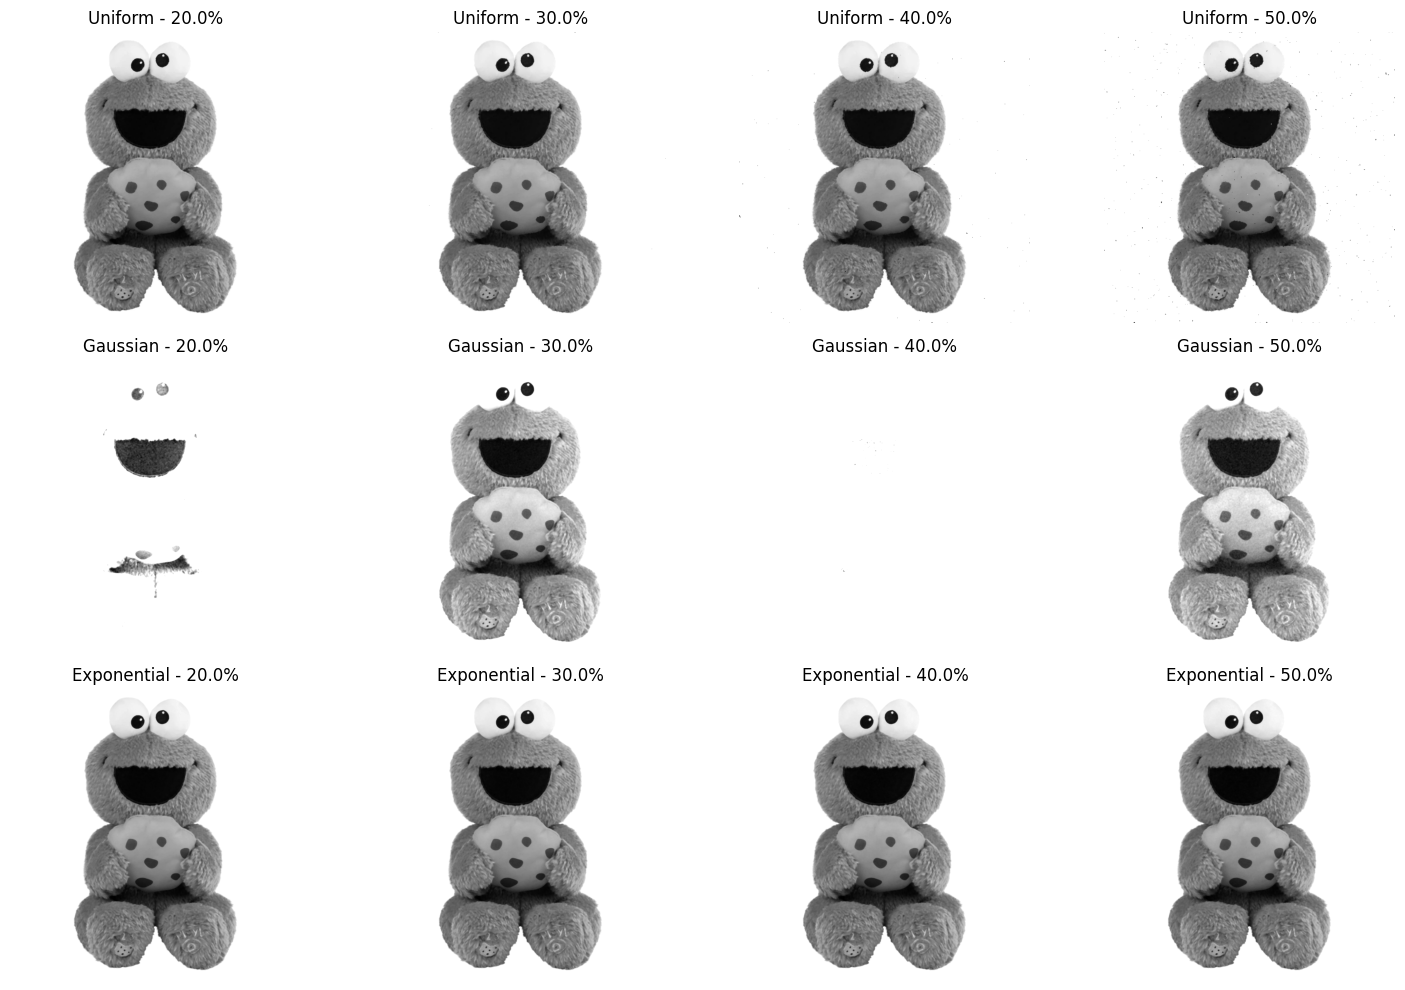

finished part C


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import median_filter

print("generating picture waiting ........")
img = cv2.imread('cookie_monster.jpg', 0)

noise_ratios = [0.1, 0.15, 0.2, 0.3, 0.4, 0.5]

fig, axs = plt.subplots(3, 6, figsize=(15, 10))

for i, noise_ratio in enumerate(noise_ratios):
    noisy_img = img.copy()
    row, col = noisy_img.shape
    number_of_pixels = int((noise_ratio * row * col) / 2)
    coords = np.random.randint(0, row, size=(number_of_pixels, 2))
    rows = coords[:, 0]
    cols = coords[:, 1]
    noisy_img[rows, cols] = 255
    coords = np.random.randint(0, row, size=(number_of_pixels, 2))
    rows = coords[:, 0]
    cols = coords[:, 1]
    noisy_img[rows, cols] = 0
    axs[0, i].imshow(noisy_img, cmap='gray')
    axs[0, i].set_title(f'Uniform - {noise_ratio * 100}%')
    axs[0, i].axis('off')
for i, noise_ratio in enumerate(noise_ratios):
    mean = np.random.uniform(0, 255)
    std = np.random.uniform(10, 50) * noise_ratio
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = img.copy()
    noisy_img = noisy_img + noise
    axs[1, i].imshow(noisy_img, cmap='gray')
    axs[1, i].set_title(f'Gaussian - {noise_ratio * 100}%')
    axs[1, i].axis('off')

for i, noise_ratio in enumerate(noise_ratios):
    noise = np.random.exponential(scale=1, size=img.shape) * noise_ratio * 10
    noisy_img = img.copy()
    noisy_img = noisy_img + noise
    axs[2, i].imshow(noisy_img, cmap='gray')
    axs[2, i].set_title(f'Exponential - {noise_ratio * 100}%')
    axs[2, i].axis('off')

plt.show()

print("part A finished.")
print("=" * 150)
print("Part B started")


def count_corrupted_pixels(original_face, noisy_face, threshold=0.2):
    diff = np.abs(original_face - noisy_face)
    corrupted_pixels = np.sum(diff > 20)
    return corrupted_pixels / original_face.size >= threshold


face_pos = (0, 0, 1000, 470)
original_face = img[face_pos[1]:face_pos[3], face_pos[0]:face_pos[2]]

noise_ratios = [0.2, 0.3, 0.4, 0.5]
results = {
    "uniform": [], "gaussian": [], "exponential": []
}

for j, noise_ratio in enumerate(noise_ratios):
    count = 0
    for _ in range(100):
        noisy_img = img.copy()
        row, col = noisy_img.shape
        number_of_pixels = int((noise_ratio * row * col) / 2)
        coords = np.random.randint(0, row, size=(number_of_pixels, 2))
        rows = coords[:, 0]
        cols = coords[:, 1]
        noisy_img[rows, cols] = 255
        coords = np.random.randint(0, row, size=(number_of_pixels, 2))
        rows = coords[:, 0]
        cols = coords[:, 1]
        noisy_img[rows, cols] = 0
        noisy_face = noisy_img[face_pos[1]:face_pos[3], face_pos[0]:face_pos[2]]
        if count_corrupted_pixels(original_face, noisy_face):
            count += 1
    results["uniform"].append(count / 100)

for j, noise_ratio in enumerate(noise_ratios):
    count = 0
    for _ in range(100):
        mean = np.random.uniform(0, 255)
        std = np.random.uniform(10, 50) * noise_ratio
        noise = np.random.normal(mean, std, img.shape)
        noisy_img = img + noise
        noisy_face = noisy_img[face_pos[1]:face_pos[3], face_pos[0]:face_pos[2]]
        if count_corrupted_pixels(original_face, noisy_face):
            count += 1
    results["gaussian"].append(count / 100)

for j, noise_ratio in enumerate(noise_ratios):
    count = 0
    for _ in range(100):
        noise = np.random.exponential(scale=1, size=img.shape) * noise_ratio * 200
        noisy_img = img + noise
        noisy_img = np.clip(noisy_img, 0, 255)
        noisy_face = noisy_img[face_pos[1]:face_pos[3], face_pos[0]:face_pos[2]]
        if count_corrupted_pixels(original_face, noisy_face):
            count += 1
    results["exponential"].append(count / 100)

for noise_type, averages in results.items():
    for noise_ratio, avg_count in zip(noise_ratios, averages):
        print(f'Average corrupted faces for {noise_type} at {noise_ratio * 100}%: {avg_count * 100}')

print("part C")
print("generating picture")
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

for i, noise_ratio in enumerate(noise_ratios):
    noisy_img = img.copy()
    row, col = noisy_img.shape
    number_of_pixels = int((noise_ratio * row * col) / 2)
    coords = np.random.randint(0, row, size=(number_of_pixels, 2))
    rows = coords[:, 0]
    cols = coords[:, 1]
    noisy_img[rows, cols] = 255
    coords = np.random.randint(0, row, size=(number_of_pixels, 2))
    rows = coords[:, 0]
    cols = coords[:, 1]
    noisy_img[rows, cols] = 0
    denoised_img = median_filter(noisy_img, size=5)
    axs[0, i].imshow(denoised_img, cmap='gray')
    axs[0, i].set_title(f'Uniform - {noise_ratio * 100}%')
    axs[0, i].axis('off')

    mean = np.random.uniform(0, 255)
    std = np.random.uniform(10, 50) * noise_ratio
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    denoised_img = median_filter(noisy_img, size=5)
    axs[1, i].imshow(denoised_img, cmap='gray')
    axs[1, i].set_title(f'Gaussian - {noise_ratio * 100}%')
    axs[1, i].axis('off')

    noise = np.random.exponential(scale=1, size=img.shape) * noise_ratio * 10
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    denoised_img = median_filter(noisy_img, size=5)
    axs[2, i].imshow(denoised_img, cmap='gray')
    axs[2, i].set_title(f'Exponential - {noise_ratio * 100}%')
    axs[2, i].axis('off')

plt.tight_layout()
plt.show()
print("finished part C")


problem14

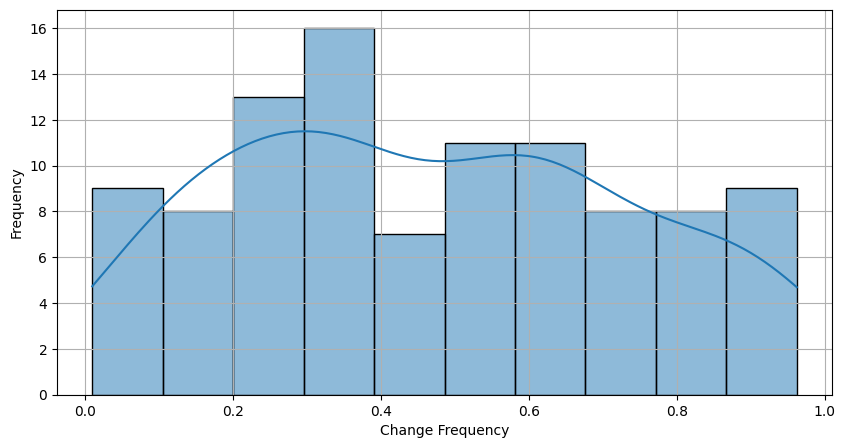

mean of frequency for fifth gene: 0.4706265454735222
standard deviation for fifth gene: 0.26917231672810366
min Change frequency for fifth gene: 0.00947350112815204
max Change frequency for fifth gene: 0.9624874914912462


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_simulations = 100
num_genes = 10

change_frequencies = np.random.uniform(low=0, high=1, size=(num_simulations, num_genes))
fifth_gene_frequencies = change_frequencies[:, 4]  # fifth gene
plt.figure(figsize=(10, 5))
sns.histplot(fifth_gene_frequencies, bins=10, kde=True)
plt.xlabel('Change Frequency')
plt.ylabel('Frequency')
plt.grid()
plt.show()

mean_fifth_gene = np.mean(fifth_gene_frequencies)
std_fifth_gene = np.std(fifth_gene_frequencies)
min_frequency = np.min(fifth_gene_frequencies)
max_frequency = np.max(fifth_gene_frequencies)
print(f"mean of frequency for fifth gene: {mean_fifth_gene}")
print(f"standard deviation for fifth gene: {std_fifth_gene}")
print(f"min Change frequency for fifth gene: {min_frequency}")
print(f"max Change frequency for fifth gene: {max_frequency}")
